# Imports

In [2]:
# Filesystem
import glob
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Time imports
import holidays
import datetime as dt
from holidays import country_holidays

# Tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

# Settings
plt.rcParams['figure.figsize'] = (12,4)
pd.set_option('display.max_columns',50)

# Load Data

In [3]:
# Check and get files from Data
FOLDER = 'Data/Chicago/'
file_list = sorted(os.listdir(FOLDER))
file_list

['Chicago-Crime_2001.csv',
 'Chicago-Crime_2002.csv',
 'Chicago-Crime_2003.csv',
 'Chicago-Crime_2004.csv',
 'Chicago-Crime_2005.csv',
 'Chicago-Crime_2006.csv',
 'Chicago-Crime_2007.csv',
 'Chicago-Crime_2008.csv',
 'Chicago-Crime_2009.csv',
 'Chicago-Crime_2010.csv',
 'Chicago-Crime_2011.csv',
 'Chicago-Crime_2012.csv',
 'Chicago-Crime_2013.csv',
 'Chicago-Crime_2014.csv',
 'Chicago-Crime_2015.csv',
 'Chicago-Crime_2016.csv',
 'Chicago-Crime_2017.csv',
 'Chicago-Crime_2018.csv',
 'Chicago-Crime_2019.csv',
 'Chicago-Crime_2020.csv',
 'Chicago-Crime_2021.csv',
 'Chicago-Crime_2022.csv',
 'Chicago-Crime_2023.csv',
 'README.txt']

In [4]:
# Get crime csv files with glob
query = FOLDER + "Chicago-*csv"
# Update file_list
file_list = sorted(glob.glob(query))
file_list


['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [5]:
# Load all files into a single df w/ list comprehension
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in file_list])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude\r
0,1317380,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,9.0,NaN,41.807498,-87.68915513\r
1,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685109858\r
2,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.945072,-87.684629263\r
3,1315458,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,1421,14.0,NaN,41.910320,-87.702020443\r
4,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,41.931374,-87.648818936\r
...,...,...,...,...,...,...,...,...,...,...,...,...
187307,13219395,09/22/2023 12:00:00 AM,CRIMINAL TRESPASS,TO LAND,DEPARTMENT STORE,True,False,1232,12.0,34.0,41.877822,-87.655181405\r
187308,13218575,09/22/2023 12:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,913,9.0,11.0,41.836155,-87.651757403\r
187309,13220541,09/22/2023 12:00:00 AM,THEFT,FROM BUILDING,WAREHOUSE,False,False,915,9.0,11.0,41.825933,-87.650845858\r
187310,13220639,09/22/2023 12:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,611,6.0,17.0,41.753223,-87.663505427\r


## Cleaning

In [6]:
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
                        'dtype':df.dtypes,
                        '# null': df.isna().sum(),
                        'null (%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),
                        "min":df.min(),
                        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()

In [7]:
summarize_df(df)

C:\Users\Foreground\AppData\Local\Temp\ipykernel_26976\836355026.py:8: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  "min":df.min(),
C:\Users\Foreground\AppData\Local\Temp\ipykernel_26976\836355026.py:9: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'max':df.max()


,Column,dtype,# null,null (%),nunique,min,max
0,Arrest,bool,0,0.000000,2,False,True
1,Beat,int64,0,0.000000,305,111,2535
2,Date,object,0,0.000000,3261208,01/01/2001 01:00:00 AM,12/31/2022 12:59:00 PM
3,Description,object,0,0.000000,550,$300 AND UNDER,WIREROOM/SPORTS
4,District,float64,47,0.000595,24,1.0,31.0
5,Domestic,bool,0,0.000000,2,False,True
6,ID,int64,0,0.000000,7900690,634,13226709
7,Latitude,float64,89927,1.138217,893067,36.619446,42.02291
8,Location Description,object,11817,0.149569,217,NaN,NaN
9,Longitude\r,object,0,0.000000,892470,\r,-91.686565684\r


# Pre-Analysis

In [8]:
# Check dt format
test = df['Date'][0]
test

0    01/01/2001 01:00:00 PM
0    01/01/2002 01:00:00 AM
0    01/01/2003 01:00:00 PM
0    01/01/2004 01:00:00 AM
0    01/01/2005 01:00:00 AM
0    01/01/2006 01:00:00 PM
0    01/01/2007 01:00:00 AM
0    01/01/2008 01:00:00 AM
0    01/01/2009 01:00:00 AM
0    01/01/2010 01:00:00 AM
0    01/01/2011 01:00:00 AM
0    01/01/2012 01:00:00 AM
0    01/01/2013 01:00:00 AM
0    01/01/2014 01:00:00 AM
0    01/01/2015 01:00:00 PM
0    01/01/2016 01:00:00 PM
0    01/01/2017 01:00:00 PM
0    01/01/2018 01:00:00 AM
0    01/01/2019 01:00:00 PM
0    01/01/2020 01:00:00 AM
0    01/01/2021 01:00:00 PM
0    01/01/2022 01:00:00 AM
0    01/01/2023 01:00:00 AM
Name: Date, dtype: object

The format is mm/dd/yyyy

In [9]:
# Set format and test it
fmt = "%m/%d/%Y %I:%M:%S %p"

# Get current date and time
current_dt = dt.datetime.now()
# Format current_dt
formatted_date = current_dt.strftime(fmt)
# Print the formatted date
print(formatted_date)

10/05/2023 12:20:30 AM


In [10]:
# Convert date to datetime dtype
df['Date'] = pd.to_datetime(df['Date'], format=fmt)
# Check updated dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7900690 entries, 0 to 187311
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
            object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 710.4+ MB


#### Set datetime as index

In [11]:
# Set date column as index
df_ts = df.set_index('Date')
df_ts.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude\r
Date,,,,,,,,,,,
2001-01-01 13:00:00,1317380,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,9.0,NaN,41.807498,-87.68915513\r
2001-01-01 01:00:00,1311144,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685109858\r
2001-01-01 01:00:00,1311226,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.945072,-87.684629263\r
2001-01-01 01:00:00,1315458,THEFT,$500 AND UNDER,STREET,False,False,1421,14.0,NaN,41.910320,-87.702020443\r
2001-01-01 01:00:00,1311503,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,41.931374,-87.648818936\r


### Feature engineering

In [12]:
# Drop columns not related to questions
df_ts = df_ts.drop(columns = ['ID', 'Location Description', 'Ward', 
                              'Latitude'])
df_ts.head()

,Primary Type,Description,Arrest,Domestic,Beat,District,Longitude\r
Date,,,,,,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,911,9.0,-87.68915513\r
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,2413,24.0,-87.685109858\r
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,1913,19.0,-87.684629263\r
2001-01-01 01:00:00,THEFT,$500 AND UNDER,False,False,1421,14.0,-87.702020443\r
2001-01-01 01:00:00,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,False,False,1933,19.0,-87.648818936\r


In [13]:
# Feature engineering year and month columns
df_ts['Year'] = df_ts.index.year
df_ts['Month'] = df_ts.index.month
df_ts['Month Name'] = df_ts.index.month_name()
df_ts.head()

,Primary Type,Description,Arrest,Domestic,Beat,District,Longitude\r,Year,Month,Month Name
Date,,,,,,,,,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,911,9.0,-87.68915513\r,2001,1,January
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,2413,24.0,-87.685109858\r,2001,1,January
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,1913,19.0,-87.684629263\r,2001,1,January
2001-01-01 01:00:00,THEFT,$500 AND UNDER,False,False,1421,14.0,-87.702020443\r,2001,1,January
2001-01-01 01:00:00,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,False,False,1933,19.0,-87.648818936\r,2001,1,January


# Resample data

In [14]:
# Resample up to daily freq
df_daily = df_ts.resample('D').size()
df_daily

Date
2001-01-01    1825
2001-01-02    1143
2001-01-03    1151
2001-01-04    1166
2001-01-05    1267
              ... 
2023-09-18     674
2023-09-19     609
2023-09-20     746
2023-09-21     679
2023-09-22       9
Freq: D, Length: 8300, dtype: int64

# Question 1: Comparing Police Districts
- Which district has the most crimes?
- Which has the least?

In [15]:
# Group districts and primary types
districts = df_ts.groupby('District')['Primary Type'].value_counts().sort_index()
df_districts = districts.to_frame('# of Crimes').reset_index()
df_districts

,District,Primary Type,# of Crimes
0,1.0,ARSON,126
1,1.0,ASSAULT,15188
2,1.0,BATTERY,34008
3,1.0,BURGLARY,5357
4,1.0,CONCEALED CARRY LICENSE VIOLATION,22
...,...,...,...
750,31.0,PUBLIC PEACE VIOLATION,1
751,31.0,ROBBERY,2
752,31.0,SEX OFFENSE,4
753,31.0,STALKING,1


In [16]:
# Aggregate crimes by district
plot_df = df_districts.groupby('District').agg({'# of Crimes' : 'sum'}).reset_index()
plot_df

,District,# of Crimes
0,1.0,321085
1,2.0,374668
2,3.0,400608
3,4.0,448487
4,5.0,349641
5,6.0,462060
6,7.0,455243
7,8.0,530554
8,9.0,385574
9,10.0,340372


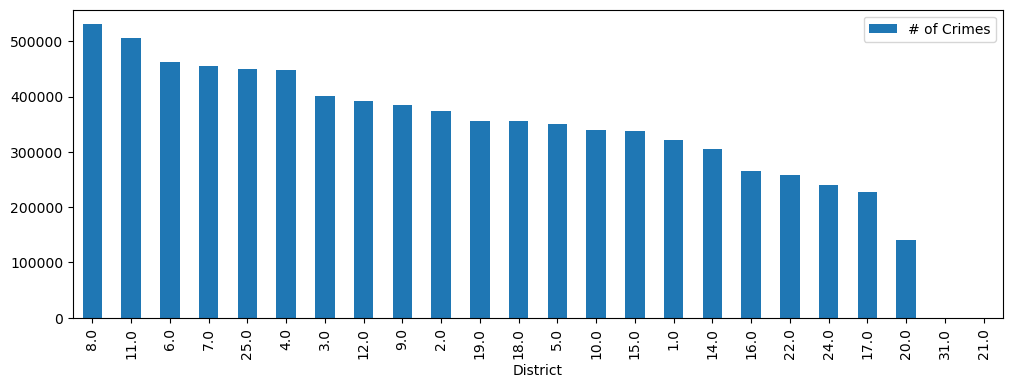

In [17]:
# Plot results
ax = plot_df.sort_values(by='# of Crimes', ascending=False).plot(
    kind='bar', x='District', y='# of Crimes'
);

- District 8 has the highest reported crimes
- District 21 has the least amount of reported crimes

# Question 2: Comparing Crimes Across the Years

- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

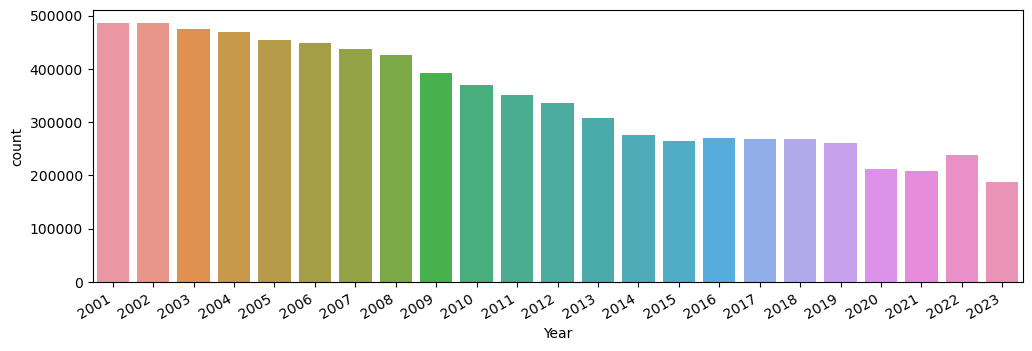

In [18]:
# Plot years
ax = sns.countplot(data=df_ts, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate();

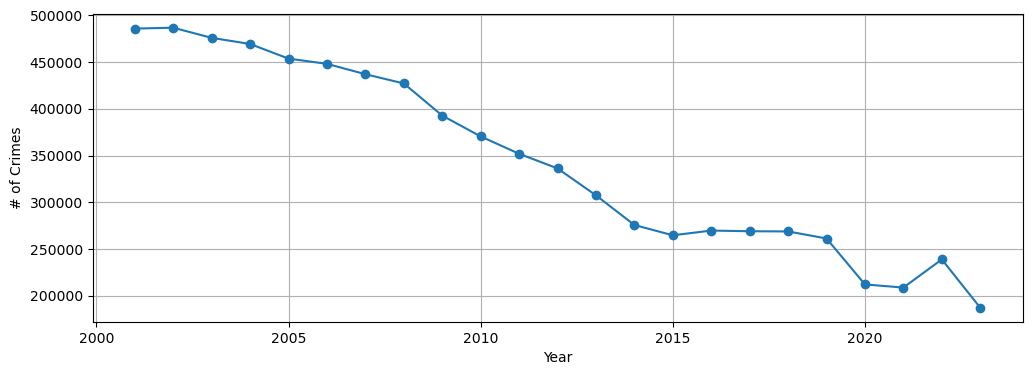

In [19]:
# Save year counts
year_counts = df_ts['Year'].value_counts().sort_index()

# Plot year counts
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

According to the plot, there is a decrease in crime over the years. The next step is to look more closely to verify this plot.

In [20]:
# Group crime type with year
crime_year = df_ts.groupby('Primary Type')['Year'].value_counts().sort_index()
crime_year

Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2019    6339
                   2020    8432
                   2021    8980
                   2022    8775
                   2023    6497
Name: Year, Length: 720, dtype: int64

In [21]:
# Convert crime_year to df
plot_df = crime_year.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,Year,# of Crimes
0,ARSON,2001,1011
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691
...,...,...,...
715,WEAPONS VIOLATION,2019,6339
716,WEAPONS VIOLATION,2020,8432
717,WEAPONS VIOLATION,2021,8980
718,WEAPONS VIOLATION,2022,8775


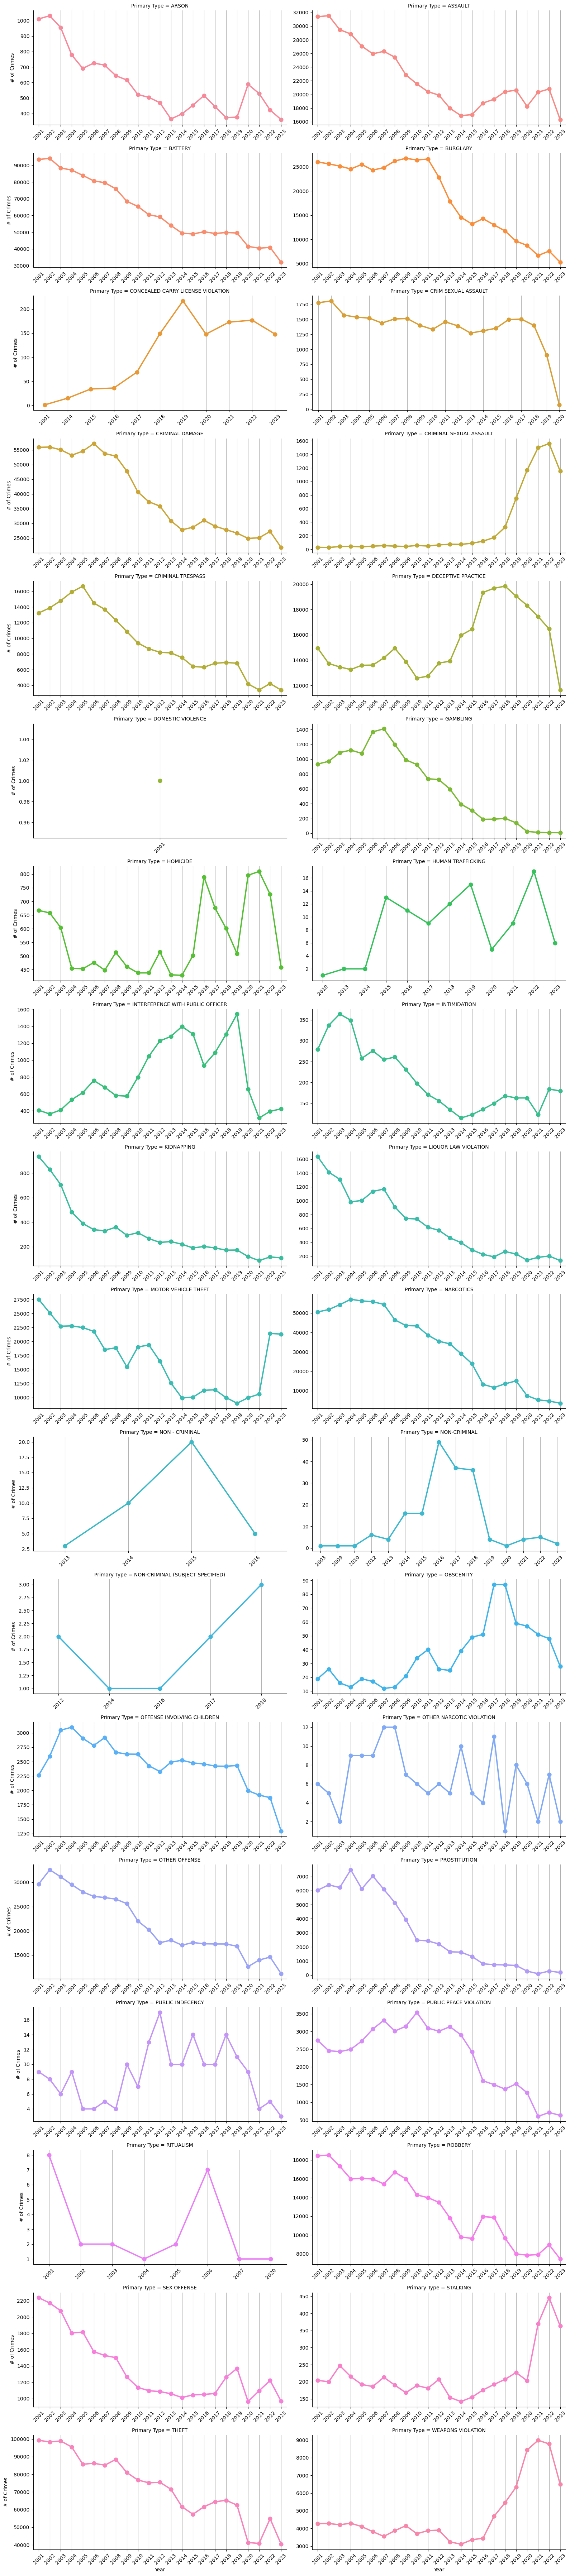

In [22]:
# Plot each type of crime with a catplot
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point', aspect=2, height=4,
                hue='Primary Type', col='Primary Type', col_wrap=2,
               sharey=False, sharex=False)
g.set_xticklabels(rotation=45)

# Add grid to each subplot
[ax.grid(axis='x') for ax in g.axes];

# Ensures the plots are properly spaced
plt.tight_layout()
plt.show()

Get the top 10 crimes to generate a more readable chart.

In [46]:
# Calculate the total freq of each primary crime type over years
crime_totals = df_ts.groupby('Primary Type').resample('Y').size().unstack().fillna(0)

# Calculate the total freq for each crime type
crime_totals['Total'] = crime_totals.sum(axis=1)

# Sort the crime types by total freq in descending order
sorted_crimes = crime_totals.sort_values(by='Total', ascending=False)

# Get the top 10 crime types
top_10_crimes = sorted_crimes.head(10)
# Quick check to see
top_10_crimes.head(10)

Date,2001-12-31 00:00:00,2002-12-31 00:00:00,2003-12-31 00:00:00,2004-12-31 00:00:00,2005-12-31 00:00:00,2006-12-31 00:00:00,2007-12-31 00:00:00,2008-12-31 00:00:00,2009-12-31 00:00:00,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00,2018-12-31 00:00:00,2019-12-31 00:00:00,2020-12-31 00:00:00,2021-12-31 00:00:00,2022-12-31 00:00:00,2023-12-31 00:00:00,Total
Primary Type,,,,,,,,,,,,,,,,,,,,,,,,
THEFT,99277.0,98332.0,98876.0,95463.0,85684.0,86240.0,85156.0,88437.0,80976.0,76757.0,75153.0,75465.0,71535.0,61568.0,57350.0,61621.0,64386.0,65287.0,62492.0,41322.0,40801.0,54830.0,40371.0,1667379.0
BATTERY,93462.0,94153.0,88380.0,87136.0,83964.0,80666.0,79593.0,75930.0,68460.0,65401.0,60459.0,59134.0,54006.0,49453.0,48923.0,50300.0,49239.0,49828.0,49517.0,41514.0,40463.0,40919.0,32059.0,1442959.0
CRIMINAL DAMAGE,55859.0,55941.0,55011.0,53164.0,54548.0,57124.0,53749.0,52843.0,47725.0,40654.0,37331.0,35855.0,30855.0,27799.0,28677.0,31018.0,29045.0,27823.0,26681.0,24877.0,25094.0,27240.0,21792.0,900705.0
NARCOTICS,50567.0,51789.0,54288.0,57060.0,56234.0,55813.0,54454.0,46506.0,43542.0,43398.0,38605.0,35489.0,34129.0,29118.0,23939.0,13333.0,11683.0,13590.0,15077.0,7492.0,5337.0,4731.0,3616.0,749790.0
ASSAULT,31384.0,31523.0,29477.0,28850.0,27067.0,25945.0,26313.0,25448.0,22861.0,21537.0,20411.0,19900.0,17972.0,16903.0,17048.0,18742.0,19306.0,20406.0,20620.0,18252.0,20342.0,20800.0,16319.0,517426.0
OTHER OFFENSE,29662.0,32600.0,31148.0,29532.0,28028.0,27101.0,26863.0,26532.0,25601.0,22012.0,20206.0,17523.0,18051.0,17019.0,17566.0,17307.0,17269.0,17264.0,16797.0,12593.0,13944.0,14566.0,11124.0,490308.0
BURGLARY,26014.0,25623.0,25157.0,24564.0,25503.0,24324.0,24858.0,26218.0,26767.0,26422.0,26620.0,22845.0,17895.0,14569.0,13184.0,14289.0,13001.0,11747.0,9638.0,8758.0,6659.0,7593.0,5278.0,427526.0
MOTOR VEHICLE THEFT,27553.0,25121.0,22748.0,22805.0,22497.0,21818.0,18573.0,18881.0,15482.0,19029.0,19388.0,16492.0,12582.0,9911.0,10068.0,11286.0,11380.0,9985.0,8977.0,9959.0,10601.0,21449.0,21337.0,387922.0
DECEPTIVE PRACTICE,14949.0,13732.0,13459.0,13255.0,13591.0,13606.0,14173.0,14933.0,13877.0,12577.0,12728.0,13766.0,13916.0,15956.0,16444.0,19348.0,19678.0,19840.0,19056.0,18321.0,17444.0,16463.0,11630.0,352742.0


In [32]:
# Drop total
top_10_crimes = top_10_crimes.drop(columns='Total')

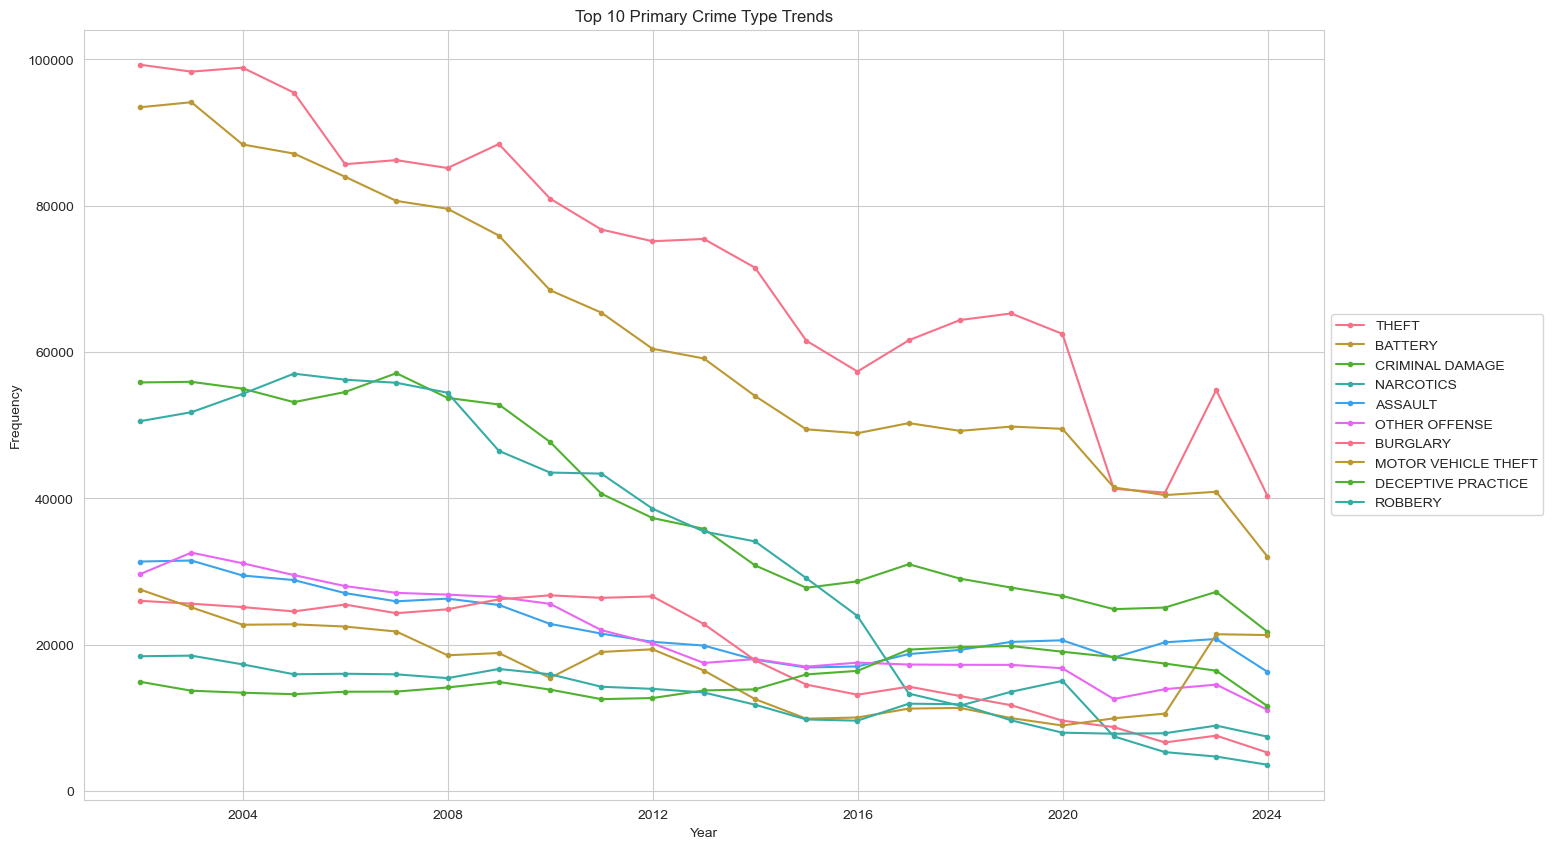

In [37]:
# Create separate plots for the top 12 crimes
plt.figure(figsize=(16, 10))
for crime in top_10_crimes.index:
        plt.plot(top_10_crimes.columns, top_10_crimes.loc[crime], marker = '.',  linestyle='-', label=crime)

plt.title('Top 10 Primary Crime Type Trends')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Overall, there is a noticable decrease in crime for the top 10 types of crime. Two points of interest are theft and motor vehicle theft.
- There is a sharp spike in theft around 2022/2023. The plot teeters off, likely due to the lack of up-to-the-minute data.
- Another spike, by nearly 10,000 is motor vehicle theft, also around the same time frame of 2022/2023.

# Question 3: Comparing Months:
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

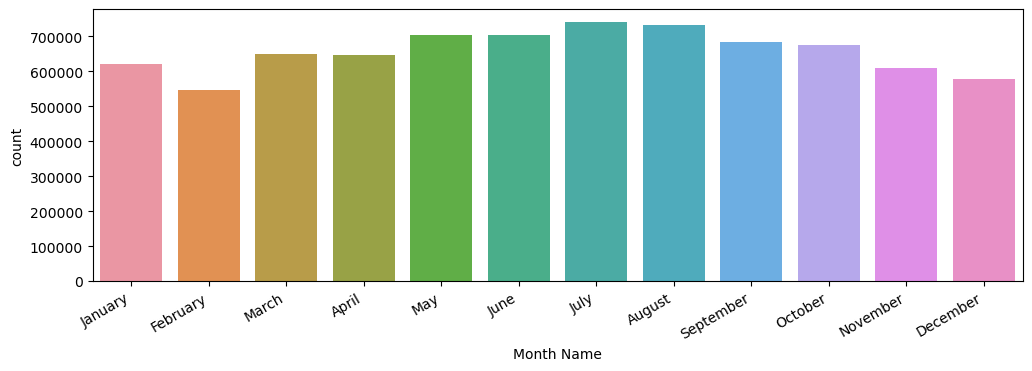

In [35]:
# Plot months
ax = sns.countplot(data=df_ts, x='Month Name')
fig = ax.get_figure()
fig.autofmt_xdate();


The top 3 months with crime are June, July, and August.
- There appears to be less crime during Autumn and Winter.

In [36]:
# Group crime type with month name
crime_month = df_ts.groupby('Primary Type')['Month'].value_counts().sort_index()
crime_month

Primary Type       Month
ARSON              1          963
                   2          841
                   3         1140
                   4         1134
                   5         1284
                            ...  
WEAPONS VIOLATION  8        10689
                   9         9936
                   10        9190
                   11        7953
                   12        7403
Name: Month, Length: 415, dtype: int64

In [37]:
# Convert to df
plot_df = crime_month.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,Month,# of Crimes
0,ARSON,1,963
1,ARSON,2,841
2,ARSON,3,1140
3,ARSON,4,1134
4,ARSON,5,1284
...,...,...,...
410,WEAPONS VIOLATION,8,10689
411,WEAPONS VIOLATION,9,9936
412,WEAPONS VIOLATION,10,9190
413,WEAPONS VIOLATION,11,7953


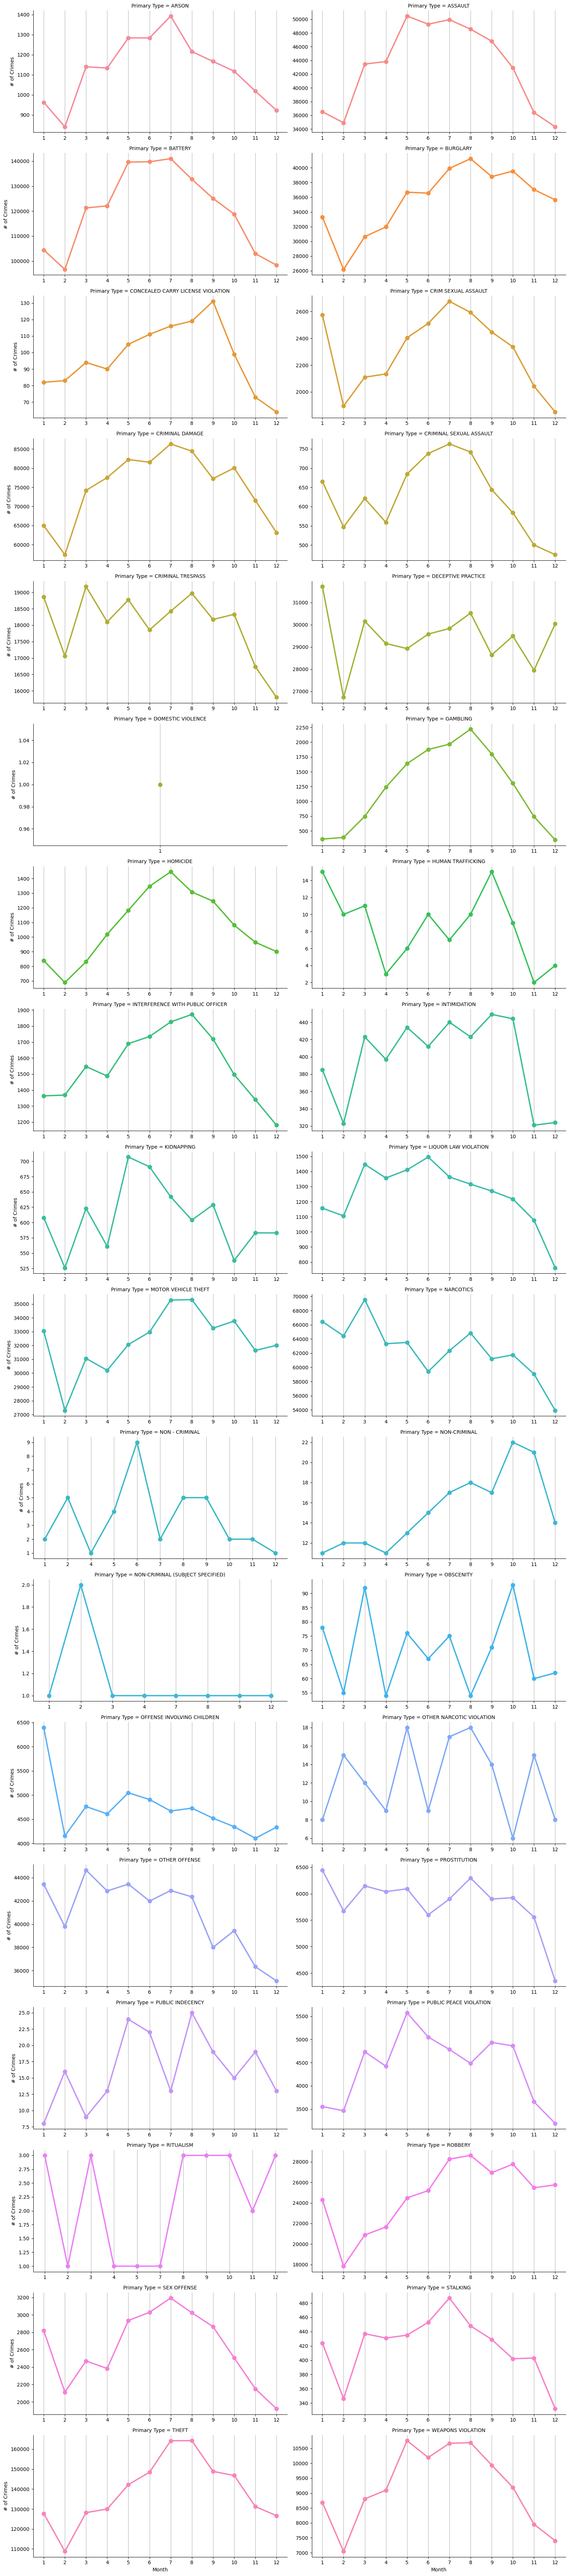

In [38]:
# Plot data
g = sns.catplot(data=plot_df, x='Month', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

A trend for more crimes can be seen during the middle of the year, particularly during the summer months.
Some crimes that do not follow the primary trend are:
- Robbery: This goes on all the way into winter, which is expected due to all of the holiday deliveries.
- Bulgary: Same as robbery, bulgary crimes increase into the holidays.
- Non-criminal - A typically low value, this begins to spike upwards starting around August and continues until the end of the year.